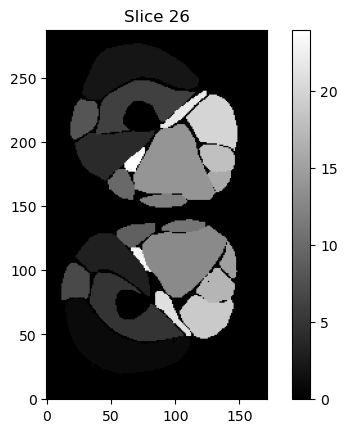

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np


nifti_image = nib.load('mask.nii')

image_data = nifti_image.get_fdata()


slice_index = image_data.shape[2] // 2
slice_data = image_data[:, :, slice_index]


plt.imshow(slice_data.T, cmap='gray', origin='lower')
plt.title(f'Slice {slice_index}')
plt.colorbar()
plt.show()

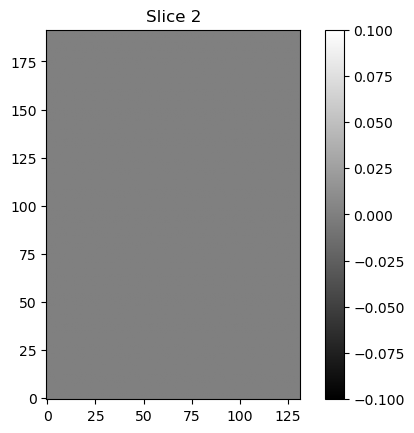

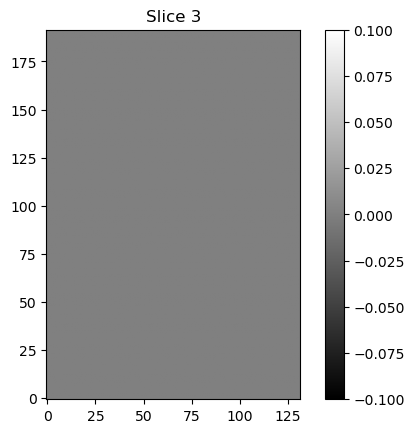

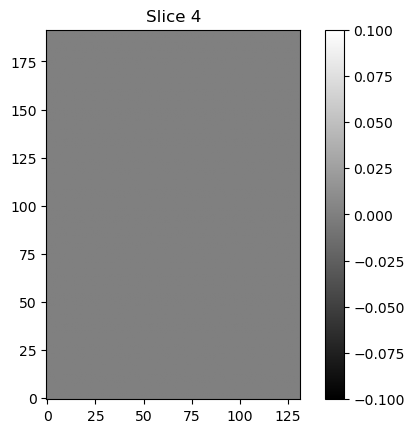

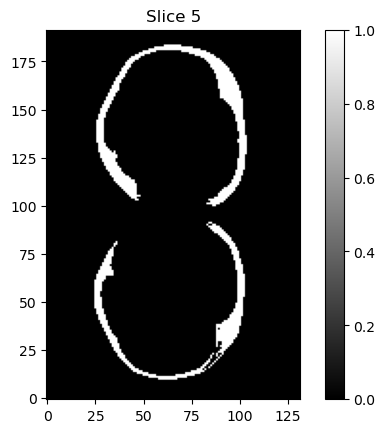

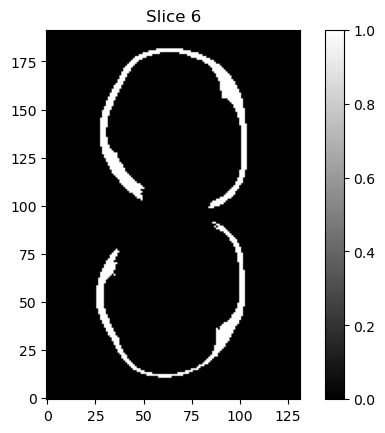

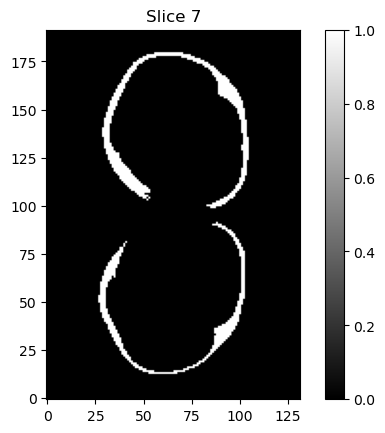

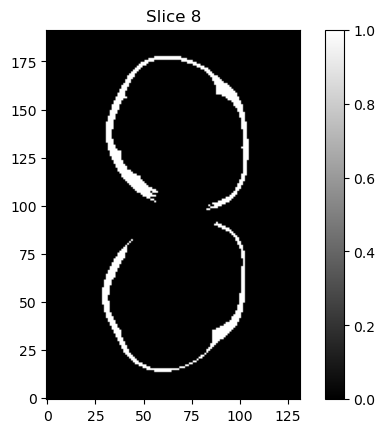

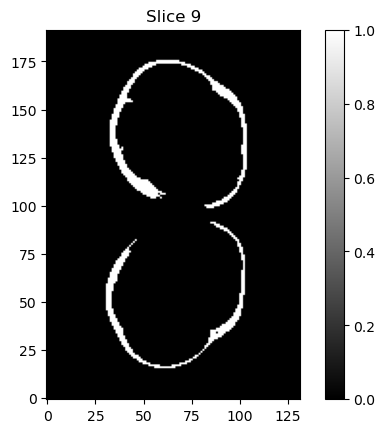

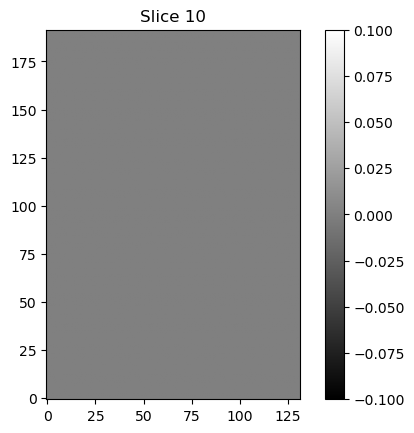

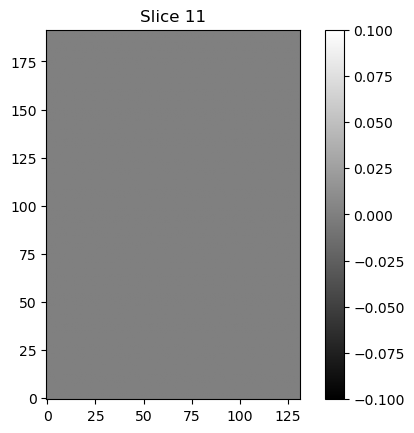

In [2]:
# Display a range of slices (e.g., from the middle of the image)
start_slice = image_data.shape[2] // 2 - 5
end_slice = image_data.shape[2] // 2 + 5

for i in range(start_slice, end_slice):
    plt.imshow(image_data[:, :, i].T, cmap='gray', origin='lower')
    plt.title(f'Slice {i}')
    plt.colorbar()
    plt.show()

In [27]:
import nibabel as nib
import numpy as np
import cv2
import os
from PIL import Image

In [33]:
# Load the NIfTI file
image_data = nifti_image.get_fdata()

# Define the folder to save the outputs
output_folder = 'MRI_output'
os.makedirs(output_folder, exist_ok=True)

# Output paths
output_video_path_0 = os.path.join(output_folder, 'MRI_video_0.avi')
output_video_path_90 = os.path.join(output_folder, 'MRI_video_90.avi')
output_video_path_180 = os.path.join(output_folder, 'MRI_video_180.avi')
output_video_path_270 = os.path.join(output_folder, 'MRI_video_270.avi')
output_gif_path = os.path.join(output_folder, 'MRI_gif.gif')

# Define slice range to display
start_slice = image_data.shape[2] // 2 - 5
end_slice = image_data.shape[2] // 2 + 5

# Define video parameters
frame_width = image_data.shape[0]  # width of the frame (height of the slice)
frame_height = image_data.shape[1]  # height of the frame (width of the slice)
fps = 5  # frames per second

# Create video writer objects for the 4 rotated videos
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_0 = cv2.VideoWriter(output_video_path_0, fourcc, fps, (frame_width, frame_height))
out_90 = cv2.VideoWriter(output_video_path_90, fourcc, fps, (frame_width, frame_height))
out_180 = cv2.VideoWriter(output_video_path_180, fourcc, fps, (frame_width, frame_height))
out_270 = cv2.VideoWriter(output_video_path_270, fourcc, fps, (frame_width, frame_height))

# List to hold images for GIF creation
gif_images = []

In [34]:
for i in range(start_slice, end_slice):
    slice_data = image_data[:, :, i]
    
    # Normalize the slice to the range [0, 255] for video compatibility
    normalized_slice = cv2.normalize(slice_data, None, 0, 255, cv2.NORM_MINMAX)
    normalized_slice = np.uint8(normalized_slice)  # Convert to unsigned 8-bit integer for video writing
    
    # Convert to 3 channels (RGB) for video writing, as OpenCV requires 3 channels for color videos
    frame = cv2.cvtColor(normalized_slice, cv2.COLOR_GRAY2BGR)

    # Add to GIF images
    gif_images.append(Image.fromarray(frame))

    # Write the frame (slice) to each of the 4 rotated videos
    out_0.write(frame)
    out_90.write(cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE))
    out_180.write(cv2.rotate(frame, cv2.ROTATE_180))
    out_270.write(cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE))

In [35]:
gif_images[0].save(output_gif_path, save_all=True, append_images=gif_images[1:], duration=100, loop=0)

# Release the video writer objects
out_0.release()
out_90.release()
out_180.release()
out_270.release()

print(f"Videos saved to {output_video_path_0}, {output_video_path_90}, {output_video_path_180}, {output_video_path_270}")
print(f"GIF saved to {output_gif_path}")

Videos saved to MRI_output\MRI_video_0.avi, MRI_output\MRI_video_90.avi, MRI_output\MRI_video_180.avi, MRI_output\MRI_video_270.avi
GIF saved to MRI_output\MRI_gif.gif


# H5 files

In [48]:
import h5py

# Path to the .h5 file
file_path = 'file1000854_N4x.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # List all groups and datasets in the file
    print("Keys in HDF5 file:", list(f.keys()))
    
    # Display the structure of each dataset/group
    def print_structure(name, obj):
        print(f"{name} : {obj}")
    
    # Iterate through each item in the HDF5 file and print its structure
    f.visititems(print_structure)

    # Access specific datasets
    # Here we use the actual dataset names from the file
    dataset_names = ['ismrmrd_header', 'kspace', 'mask']
    
    for dataset_name in dataset_names:
        dataset = f[dataset_name]
        print(f"\nDataset '{dataset_name}' content:")
        
        # Check if the dataset is scalar (i.e., single value) or array
        if dataset.ndim == 0:
            # Scalar dataset, print the single value directly
            print(dataset[()])
        else:
            # Non-scalar dataset, print its content
            print(dataset[:])  # Display the content of the dataset


Keys in HDF5 file: ['ismrmrd_header', 'kspace', 'mask']
ismrmrd_header : <HDF5 dataset "ismrmrd_header": shape (), type "|O">
kspace : <HDF5 dataset "kspace": shape (3, 640, 372), type "<c8">
mask : <HDF5 dataset "mask": shape (372,), type "|b1">

Dataset 'ismrmrd_header' content:
b'<?xml version="1.0"?>\n<ismrmrdHeader xmlns="http://www.ismrm.org/ISMRMRD" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xs="http://www.w3.org/2001/XMLSchema" xsi:schemaLocation="http://www.ismrm.org/ISMRMRD ismrmrd.xsd">\n\t<studyInformation>\n\t\t<studyTime>09:52:34</studyTime>\n\t</studyInformation>\n\t<measurementInformation>\n\t\t<measurementID>41194_46383013_46383022_1301</measurementID>\n\t\t<patientPosition>FFS</patientPosition>\n\t\t<protocolName>COR</protocolName>\n\t\t<frameOfReferenceUID>1.3.12.2.1107.5.2.18.41194.1.20180131094157798.0.0.5010</frameOfReferenceUID>\n\t</measurementInformation>\n\t<acquisitionSystemInformation>\n\t\t<systemVendor>SIEMENS</systemVendor>\n\t\t<systemMo

In [49]:
import h5py

def inspect_hdf5_file(file):
    for group_name in file:
        print(f"Group: {group_name}")
        group = file[group_name]
        
        if isinstance(group, h5py.Group):  # Check if it's a group
            for dataset_name in group:
                dataset = group[dataset_name]
                
                # Check if the dataset is scalar
                if isinstance(dataset, h5py.Dataset):
                    if dataset.ndim == 0:
                        # It's a scalar dataset
                        print(f"  Dataset: {dataset_name}, value: {dataset[()]}")
                    else:
                        # It's an array-like dataset
                        print(f"  Dataset: {dataset_name}, shape: {dataset.shape}")
        elif isinstance(group, h5py.Dataset):  # If the group is itself a dataset
            print(f"  Dataset: {group_name}, shape: {group.shape}")

# Open the file in read mode
with h5py.File('file1000854_N4x.h5', 'r') as f:
    inspect_hdf5_file(f)


Group: ismrmrd_header
  Dataset: ismrmrd_header, shape: ()
Group: kspace
  Dataset: kspace, shape: (3, 640, 372)
Group: mask
  Dataset: mask, shape: (372,)


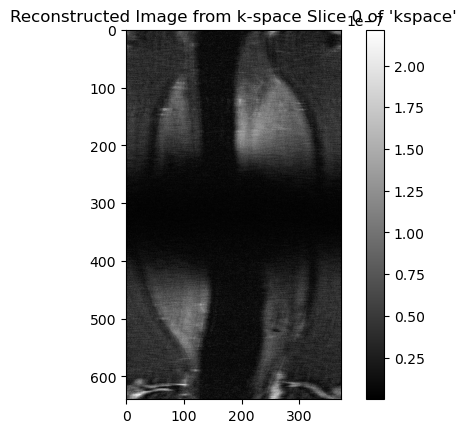

In [52]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the .h5 file
file_path = 'file1000854_N4x.h5'

# Function to display the reconstructed image from k-space data
def display_reconstructed_image_from_kspace(file, dataset_name, slice_index=0):
    # Check if the dataset exists in the file
    if dataset_name in file:
        dataset = file[dataset_name]
        
        # If it's a multi-dimensional dataset (e.g., 3D array), select a slice
        if dataset.ndim >= 3:
            kspace_slice = dataset[slice_index]
        elif dataset.ndim == 2:
            kspace_slice = dataset[:]  # If 2D, use the whole image
        else:
            print(f"Dataset '{dataset_name}' is not image-like.")
            return
        
        # Apply the inverse Fourier transform (to reconstruct the image)
        reconstructed_image = np.fft.ifft2(kspace_slice)
        
        # For complex data, take the magnitude of the result
        reconstructed_image_magnitude = np.abs(reconstructed_image)
        
        # Display the reconstructed image
        plt.imshow(reconstructed_image_magnitude, cmap='gray')
        plt.title(f"Reconstructed Image from k-space Slice {slice_index} of '{dataset_name}'")
        plt.colorbar()
        plt.show()
    else:
        print(f"Dataset '{dataset_name}' not found.")

# Open the file in read mode
with h5py.File(file_path, 'r') as f:
    # Display the reconstructed image from the 'kspace' dataset (you can change the dataset and slice)
    display_reconstructed_image_from_kspace(f, 'kspace', slice_index=0)  # Adjust slice_index if needed
